In [7]:
%config InlineBackend.figure_formats = ['retina']

import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [8]:
oscars_df = pd.read_csv('oscar_movies_data_2.csv')

In [9]:
oscars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1136 entries, 0 to 1135
Columns: 109 entries, Unnamed: 0 to Writer_Woody Allen
dtypes: float64(76), int64(15), object(18)
memory usage: 967.5+ KB


## MVP Model

In [10]:
#oscars_df[['R','G','PG-13','PG','Drama']].fillna(0)

In [11]:
oscars_df.drop(columns='Unnamed: 0',inplace = True,axis=1)

In [12]:
oscars_df.corr()

,runtime (mins),metacritic score,budget,Total_Noms,Avg_Award_Score,Awards_Best Actor in a Leading Role,Awards_Best Actor in a Supporting Role,Awards_Best Actress in a Leading Role,Awards_Best Art Direction-Set Decoration,Awards_Best Cinematography,...,Writer_Aaron Sorkin,Writer_Joel Coen,Writer_John Logan,Writer_Lawrence Kasdan,Writer_Paul Thomas Anderson,Writer_Pedro Almodóvar,Writer_Peter Morgan,Writer_Quentin Tarantino,Writer_William Shakespeare,Writer_Woody Allen
runtime (mins),1.000000,-0.019315,0.215425,0.355896,0.086005,0.057316,-0.002587,-0.110538,0.047673,-0.008730,...,-0.023114,-0.132803,0.229385,0.031129,0.366141,-0.215690,-0.056219,0.478316,0.156014,-0.570291
metacritic score,-0.019315,1.000000,-0.157224,0.327954,0.472480,0.018230,-0.057095,-0.117517,-0.138721,-0.094469,...,-0.023612,0.096561,-0.079062,-0.302794,0.271909,0.262293,0.007698,0.042797,-0.248121,-0.022064
budget,0.215425,-0.157224,1.000000,0.047432,-0.063835,-0.099809,-0.086524,-0.057325,0.026732,-0.008485,...,0.033988,-0.066141,0.588325,0.127137,-0.074738,-0.189725,-0.067855,0.084962,-0.091080,-0.255973
Total_Noms,0.355896,0.327954,0.047432,1.000000,0.289615,0.034515,-0.082633,-0.171212,-0.101990,-0.081325,...,-0.079862,0.020791,0.259185,-0.012004,0.112646,-0.222301,-0.025416,0.247848,-0.071828,-0.177043
Avg_Award_Score,0.086005,0.472480,-0.063835,0.289615,1.000000,-0.168470,-0.228600,-0.432965,-0.221517,-0.056533,...,-0.028251,0.251645,0.023887,-0.293702,0.093793,-0.052859,0.084199,0.165826,-0.220342,-0.052113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Writer_Pedro Almodóvar,-0.215690,0.262293,-0.189725,-0.222301,-0.052859,-0.055902,-0.100000,NaN,-0.074702,-0.031250,...,-0.095260,-0.119866,-0.086207,-0.103807,-0.086207,1.000000,-0.076450,-0.095260,-0.076450,-0.142422
Writer_Peter Morgan,-0.056219,0.007698,-0.067855,-0.025416,0.084199,-0.080322,-0.143684,NaN,-0.107335,-0.044901,...,-0.084478,-0.106299,-0.076450,-0.092057,-0.076450,-0.076450,1.000000,-0.084478,-0.067797,-0.126302
Writer_Quentin Tarantino,0.478316,0.042797,0.084962,0.247848,0.165826,0.160357,-0.041833,NaN,-0.178571,-0.074702,...,-0.105263,-0.132453,-0.095260,-0.114708,-0.095260,-0.095260,-0.084478,1.000000,-0.084478,-0.157378
Writer_William Shakespeare,0.156014,-0.248121,-0.091080,-0.071828,-0.220342,0.266667,-0.178885,NaN,0.454344,-0.055902,...,-0.084478,-0.106299,-0.076450,-0.092057,-0.076450,-0.076450,-0.067797,-0.084478,1.000000,-0.126302


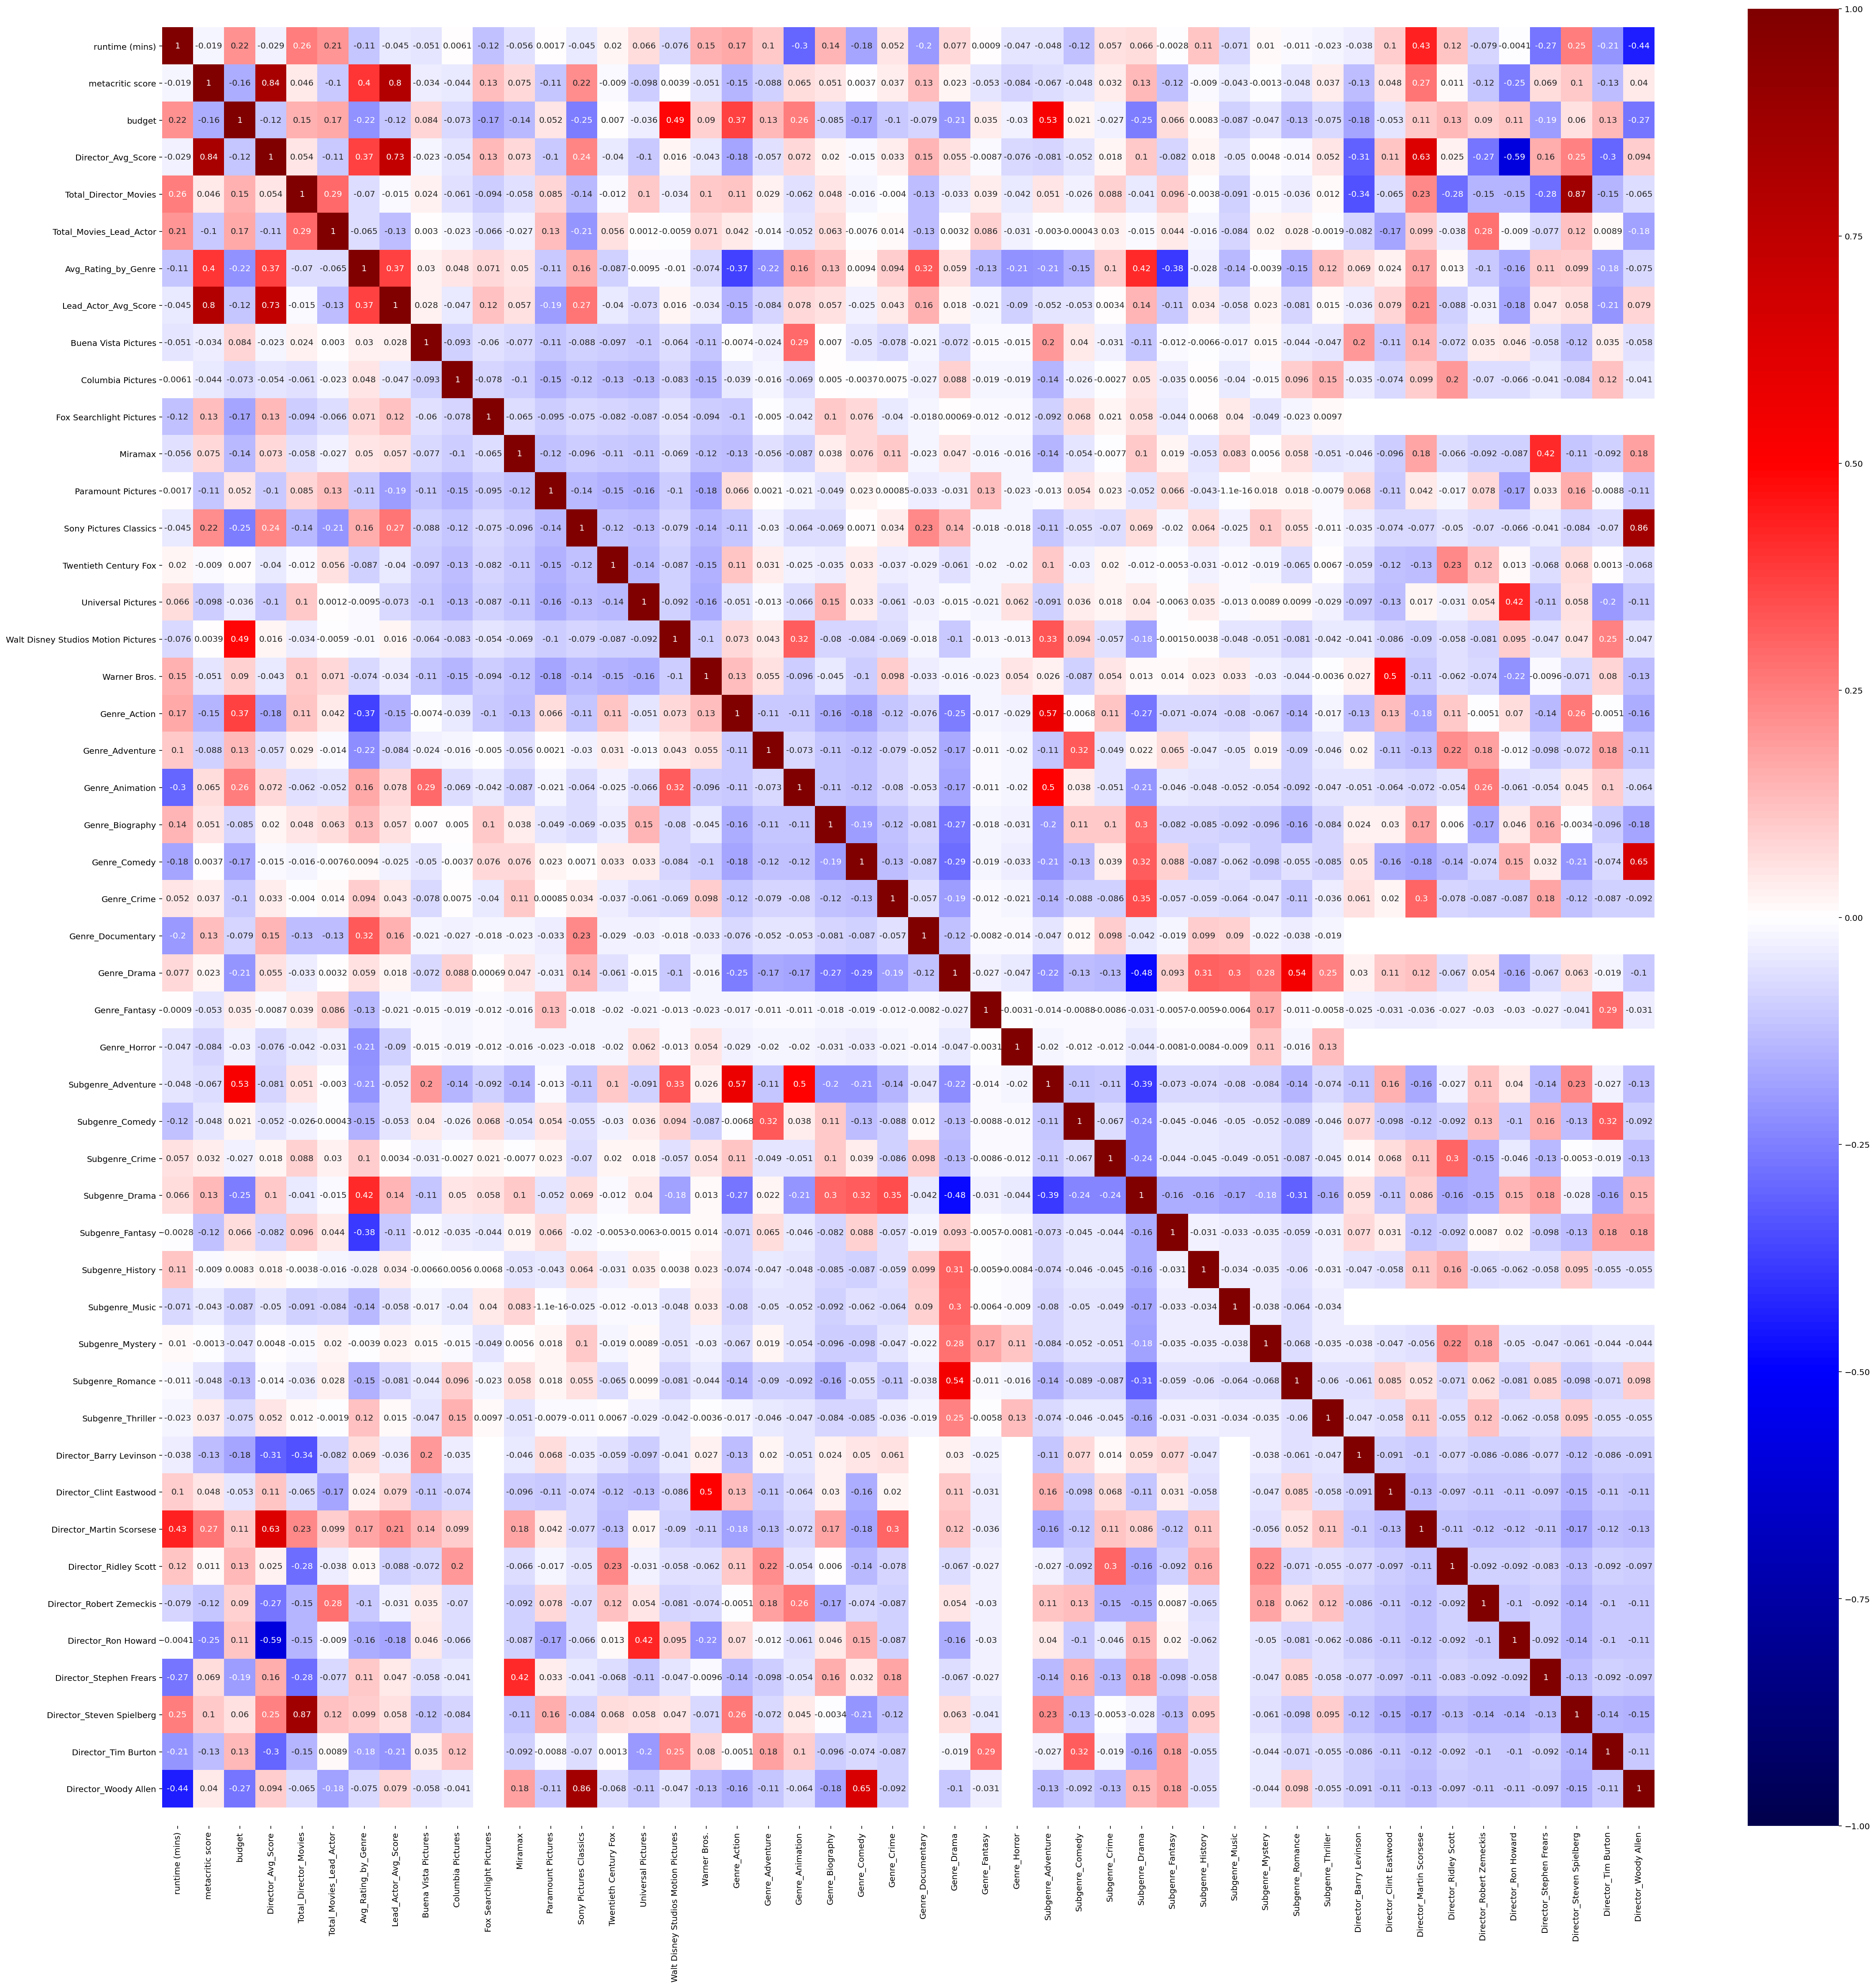

In [8]:
plt.figure(figsize=(40,40))
sns.heatmap(oscars_df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1)

plt.gca().set_ylim(len(oscars_df.corr())+0.5, -0.5);

In [13]:
smaller_df = oscars_df[['metacritic score','Director_Avg_Score','Lead_Actor_Avg_Score','Avg_Rating_by_Genre']]
#y = oscars_df['metacritic score']

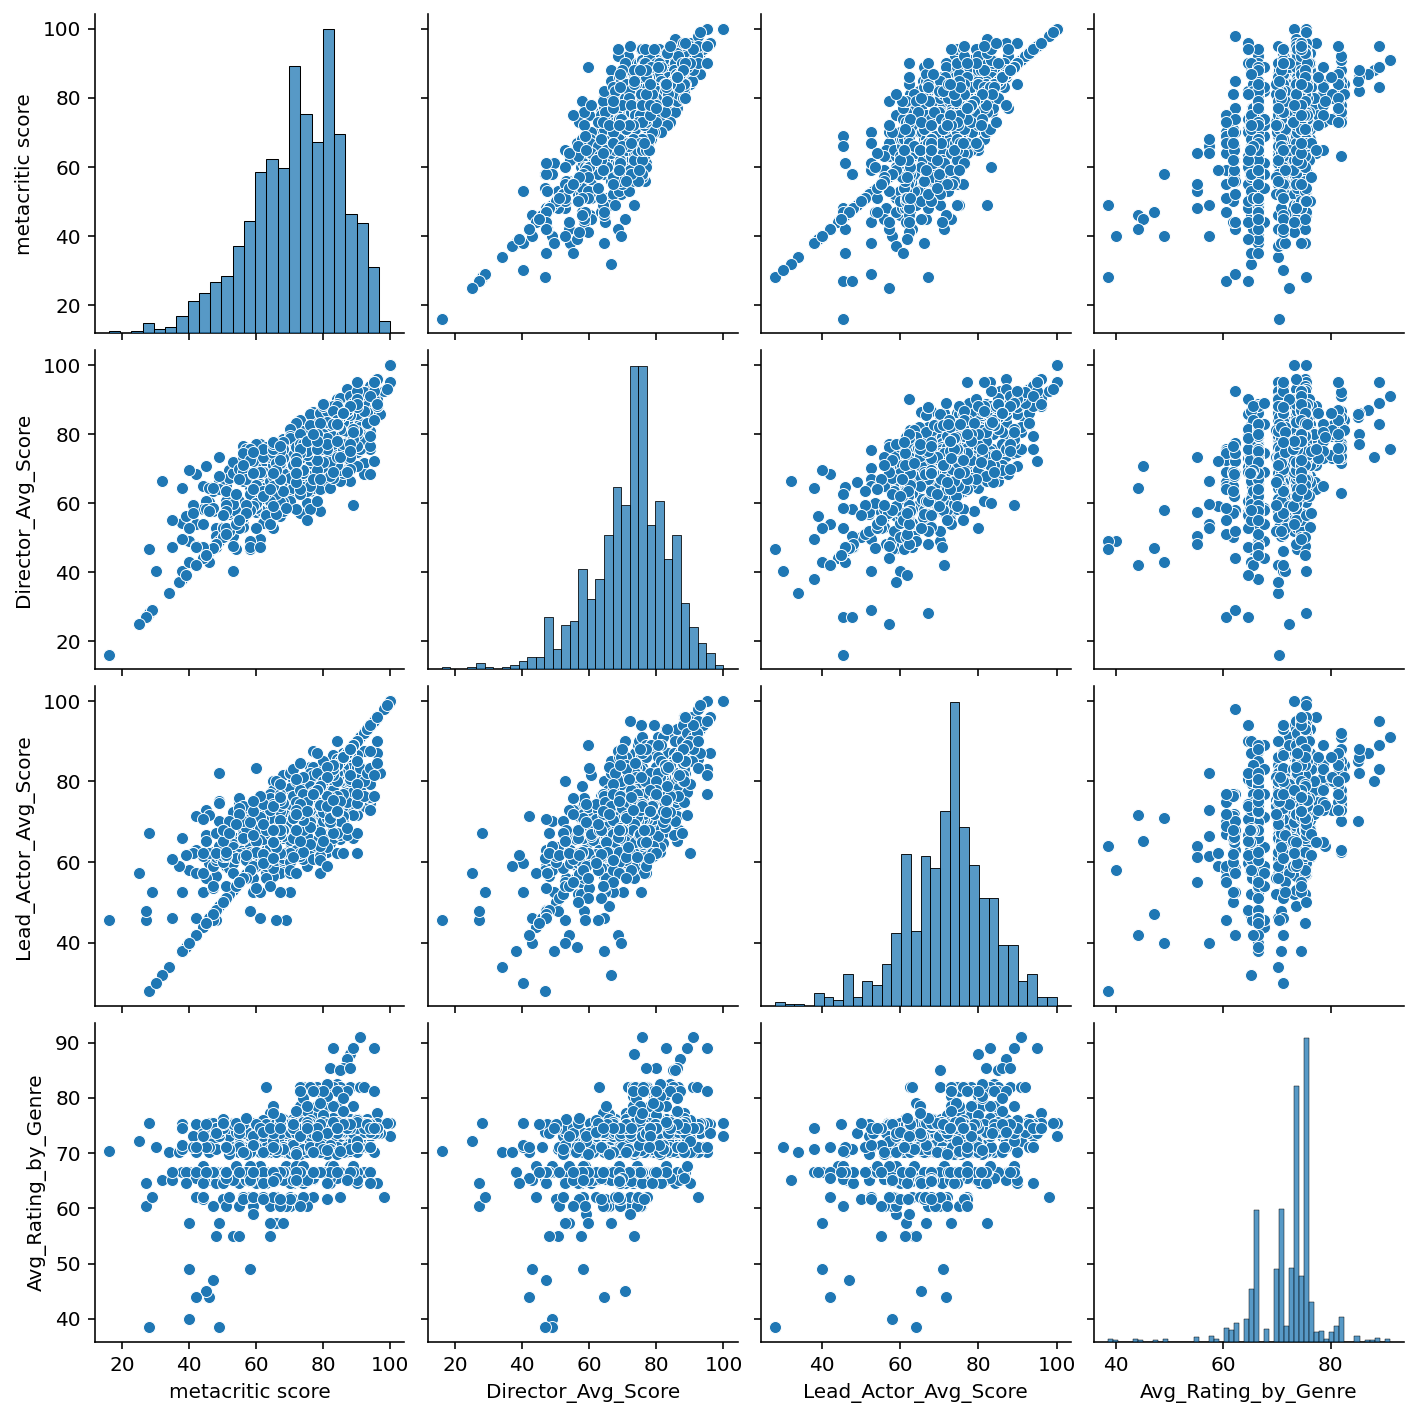

In [15]:
sns.pairplot(smaller_df)

In [15]:
X = oscars_df[['Director_Avg_Score','Lead_Actor_Avg_Score','Avg_Rating_by_Genre']]
y = oscars_df['metacritic score']

In [16]:
mvp_model = sm.OLS(y,X,)
mvp_fit = mvp_model.fit()
mvp_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       metacritic score   R-squared (uncentered):                   0.992
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                          4.884e+04
Date:                Wed, 07 Oct 2020   Prob (F-statistic):                        0.00
Time:                        19:56:24   Log-Likelihood:                         -3725.1
No. Observations:                1136   AIC:                                      7456.
Df Residuals:                    1133   BIC:                                      7471.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Director_Avg_Score       0.6440      0.025     26.009      0.000       0.595       0.693
Lead_Actor_Avg_Score     0.4592      0.026     17.630      0.000       0.408       0.510
Avg_Rating_by_Genre     -0.1019      0.020     -5.059      0.000      -0.141      -0.062
==============================================================================
Omnibus:                       44.908   Durbin-Watson:                   1.848
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.264
Skew:                          -0.207   Prob(JB):                     1.03e-22
Kurtosis:                       4.403   Cond. No.                         21.8
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
# Create an empty model
lr_full = LinearRegression()

# Features
X = oscars_df[['Director_Avg_Score','Lead_Actor_Avg_Score','Avg_Rating_by_Genre']]
X = X.fillna(0)

# Target
y = oscars_df['metacritic score']

# Fit  
lr_full.fit(X, y)

# Score
lr_full.score(X, y)

0.7854824407398189

In [23]:
from sklearn.preprocessing import PolynomialFeatures

p = PolynomialFeatures()
X_poly = p.fit_transform(X)

lr_full = LinearRegression()
lr_full.fit(X_poly, y)
lr_full.score(X_poly, y)

0.7893427383397736

In [24]:
X.shape

(1136, 3)

In [25]:
X_poly.shape

(1136, 10)